<a href="https://colab.research.google.com/github/tiravata/2014-slides/blob/master/5_tf_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><img height="45px" src="https://avatars3.githubusercontent.com/u/20337240?s=460&v=4" align="left" hspace="10px" vspace="0px">
</div>
<h1>Pose Estimation

</h1>

<hr>

<a href='https://www.facebook.com/programmerthai'><font color='green'>สรุปและเรียบเรียงโดย โปรแกรมเมอร์ไทย thai programmer</font></a>



cite

* https://github.com/ildoonet/tf-pose-estimation

* https://github.com/CMU-Perceptual-Computing-Lab/openpose

# วิธีใช้งาน colab

Colab พัฒนาโดย google เป็นหน้าเว็บเอาไว้ใช้เขียนโค้ด python ได้ผ่านทางหน้าเว็บ และเชื่อมต่อกับ google drive ของเราก็ได้ด้วย ซึ่ง colab หน้านี้**ได้รวบรวมเนื้อหา Python ของม.ต้น** เอาไว้ แต่ก่อนอื่นอยากให้ดูวิธีการใช้งาน colab เสียก่อน

<h3>กด Save a copy in Drive ... เพื่อบันทึกไว้ google drive เครื่องเรา</h3>

(ต้องมี Gmail และ google drive)

<img height="300px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_1.png" align="left" hspace="10px" vspace="0px">

<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_2.png" align="left" hspace="10px" vspace="0px">


<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_3.png" align="left" hspace="10px" vspace="0px">

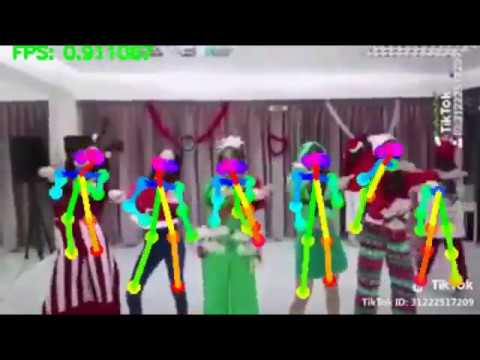

In [ ]:
#@title แนะนำ Pose estimation
#@markdown เทคโนโลยีที่จะประมาณการณ์ท่วงท่ามนุษย์ เพื่อตรวจจับจุดสำคัญๆ บนร่างกายได้
from IPython.display import YouTubeVideo
YouTubeVideo('F3AvMuxR1wQ', width=600, height=400)

# Setup environment

In [ ]:
import tensorflow
print(tensorflow.__version__)

In [ ]:
!pip install tensorflow==1.14.0

# Clone Repo
run first time when new connecting

In [ ]:
!git clone https://github.com/ildoonet/tf-pose-estimation.git > /dev/null
%cd /content/tf-pose-estimation
!pip -q install -r requirements.txt
!python setup.py install

fatal: destination path 'tf-pose-estimation' already exists and is not an empty directory.
/content/tf-pose-estimation
--2020-04-24 02:23:50--  http://download686.mediafire.com/7zgziqclicpg/qlzzr20mpocnpa3/graph_opt.pb
Resolving download686.mediafire.com (download686.mediafire.com)... 205.196.120.134
Connecting to download686.mediafire.com (download686.mediafire.com)|205.196.120.134|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Retrying.

--2020-04-24 02:23:51--  (try: 2)  http://download686.mediafire.com/7zgziqclicpg/qlzzr20mpocnpa3/graph_opt.pb
Connecting to download686.mediafire.com (download686.mediafire.com)|205.196.120.134|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Giving up.

running install
running bdist_egg
running egg_info
writing tf_pose.egg-info/PKG-INFO
writing dependency_links to tf_pose.egg-info/dependency_links.txt
writing requirements to tf_pose.egg-info/requires.txt
writing top-level names to tf_pose.e

In [ ]:
!wget https://www.dropbox.com/s/nf7ffqjv37dvin0/graph_opt.pb?dl=0 -O ./models/graph/cmu/graph_opt.pb 
  

--2020-04-24 02:24:09--  https://www.dropbox.com/s/nf7ffqjv37dvin0/graph_opt.pb?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nf7ffqjv37dvin0/graph_opt.pb [following]
--2020-04-24 02:24:10--  https://www.dropbox.com/s/raw/nf7ffqjv37dvin0/graph_opt.pb
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7ba06a04d4294ad5865d125514.dl.dropboxusercontent.com/cd/0/inline/A2Zej96pwPLw0JbR8tC_oWjLJXgLeQs4gKE_oEeJEgV5-mZytCmL3I0vrDDJcbndiltwTyVBiDeAaRURLVcMZofnRidFk4b2pcKOW8Z6HAY3fg/file# [following]
--2020-04-24 02:24:10--  https://uc7ba06a04d4294ad5865d125514.dl.dropboxusercontent.com/cd/0/inline/A2Zej96pwPLw0JbR8tC_oWjLJXgLeQs4gKE_oEeJEgV5-mZytCmL3I0vrDDJcbndiltwTyVBiDeAaRURLVcMZofnRidFk4b2pcKOW8Z6HAY3fg/file
Resolving uc7b

In [ ]:
!sudo apt install swig
%cd tf_pose/pafprocess
!swig -python -c++ pafprocess.i && python3 setup.py build_ext --inplace
%cd /content/tf-pose-estimation

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/content/tf-pose-estimation/tf_pose/pafprocess
running build_ext
/content/tf-pose-estimation


# สร้างโฟลเดอร์เก็บไฟล์วีดีโอ

In [ ]:
#run_on_colab = True

In [ ]:
import os
import shutil

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)


In [ ]:
PATH_VIDEOS = '/content/tf-pose-estimation/tmp/videos/'
PATH_OUTPUT   = '/content/tf-pose-estimation/tmp/output/'

createFolder(PATH_VIDEOS)
createFolder(PATH_OUTPUT)

# Mounting Google Drive locally (ไม่ได้ใช้)

In [ ]:
'''
PATH_VIDEOS = '/content/gdrive/My Drive/tmp/videos/'
PATH_OUTPUT = '/content/gdrive/My Drive/tmp/output/'

from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/gdrive')  

!mkdir "/content/gdrive/My Drive/tmp/"
!mkdir "/content/gdrive/My Drive/tmp/videos/"
!mkdir "/content/gdrive/My Drive/tmp/output/"
'''

 

'\nPATH_VIDEOS = \'/content/gdrive/My Drive/tmp/videos/\'\nPATH_OUTPUT = \'/content/gdrive/My Drive/tmp/output/\'\n\nfrom google.colab import drive\n# This will prompt for authorization.\ndrive.mount(\'/content/gdrive\')  \n\n!mkdir "/content/gdrive/My Drive/tmp/"\n!mkdir "/content/gdrive/My Drive/tmp/videos/"\n!mkdir "/content/gdrive/My Drive/tmp/output/"\n'

In [ ]:
'''
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))
'''

'\n# Import PyDrive and associated libraries.\n# This only needs to be done once per notebook.\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n\n# Authenticate and create the PyDrive client.\n# This only needs to be done once per notebook.\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\n\n# Download a file based on its file ID.\n#\n# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz\nfile_id = \'REPLACE_WITH_YOUR_FILE_ID\'\ndownloaded = drive.CreateFile({\'id\': file_id})\nprint(\'Downloaded content "{}"\'.format(downloaded.GetContentString()))\n'

# Download ตัวอย่างจาก youtube

In [ ]:
!pip -q install pytube3

In [ ]:
#@title กำหนดชื่อ url ของวีดีโอบน youtube
video_url = "https://youtu.be/CCh6fXSChOg" #@param {type:"string"}


In [ ]:
import pytube
youtube = pytube.YouTube(video_url)
video = youtube.streams.first()
video.download(PATH_VIDEOS)

'/content/tf-pose-estimation/tmp/videos/[GIANTS TV] 1982 클래식씨리즈 - 댄스배틀 ①.mp4'

In [ ]:
#@title แสดงไฟล์วีดีโอ
file_download_name = "[GIANTS TV] 1982 \uD074\uB798\uC2DD\uC528\uB9AC\uC988 - \uB304\uC2A4\uBC30\uD2C0 \u2460.mp4" #@param {type:"string"}


from IPython.display import HTML
from base64 import b64encode

import os
file_mp4= os.path.join(PATH_VIDEOS,file_download_name)

video_encoded = open( file_mp4, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(video_encoded).decode()
HTML('<video width=500 controls> <source src="%s" type="video/mp4"></video>' % data_url)

NameError: ignored

# Upload image file (ไมได้ใช้)



In [ ]:
'''
if run_on_colab == False:
  createFolder("/content/tf-pose-estimation/my_output/")  
  createFolder("/content/tf-pose-estimation/my_videos/") 
  
  from google.colab import files
  print("Upload your video file")
  #files.upload() 
  files = files.upload()
  #mkdir "/content/machine-learning/Artistic_style/checkpoint"
'''

'\nif run_on_colab == False:\n  createFolder("/content/tf-pose-estimation/my_output/")  \n  createFolder("/content/tf-pose-estimation/my_videos/") \n  \n  from google.colab import files\n  print("Upload your video file")\n  #files.upload() \n  files = files.upload()\n  #mkdir "/content/machine-learning/Artistic_style/checkpoint"\n'

# Pose estimate in your videos

In [ ]:
import sys
import time

from tf_pose.estimator import TfPoseEstimator
import cv2
from tf_pose.networks import get_graph_path,model_wh
from tf_pose import common

def pose_estimate_video(video_name, path_video=PATH_VIDEOS, path_out=PATH_OUTPUT):
  w, h = model_wh("432x368")
  e = TfPoseEstimator(get_graph_path("mobilenet_thin"), target_size=(w, h))
  #e = TfPoseEstimator(get_graph_path("cmu"), target_size=(w, h))
  input_file = os.path.join(path_video, video_name )
  cap = cv2.VideoCapture(input_file )

  width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float
  height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # float
  fps = cap.get(cv2.CAP_PROP_FPS) # float
	
  property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
  total_frame = int(cv2.VideoCapture.get(cap, property_id))
  print("Total frames: ", total_frame)

  fourcc = cv2.VideoWriter_fourcc(*'MJPG')  
  output_file = os.path.join(path_out, video_name )
  out = cv2.VideoWriter(output_file, fourcc, fps, (int(width), int(height)))
    
  fps_time = 0
  count = 1
  if cap.isOpened() is False:
	   print("Error opening video stream or file")
  while cap.isOpened():
    ret_val, image = cap.read()
    if ret_val == False:
      break
          
    humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    #logger.debug('postprocess+')
    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    
    #logger.debug('show+')    
    cv2.putText(image,
					"FPS: %f" % (1.0 / (time.time() - fps_time)),
					(10, 10),  cv2.FONT_HERSHEY_SIMPLEX, 0.5,
					(0, 255, 0), 2)
   
    fps_time = time.time()
	  
    #cv2.imshow('tf-pose-estimation result', image)
    out.write(image)
    print("frame %d -> %d" % (count, total_frame) , end="\r", flush=True); count+=1
    
    if count==1200:
      # break
      pass

    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
	
	# When everything done, release the capture
  cap.release()
  #cv2.destroyAllWindows()


import os.path
for file in os.listdir(PATH_VIDEOS):
  if os.path.isfile(os.path.join(PATH_VIDEOS, file )):
    print("Read file:", file)
    pose_estimate_video(file, path_video=PATH_VIDEOS, path_out=PATH_OUTPUT)
    print("Create video %s successfull" % file)

[2020-04-24 03:04:27,920] [TfPoseEstimator] [INFO] loading graph from /content/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
2020-04-24 03:04:27,920 INFO loading graph from /content/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


Read file: [GIANTS TV] 1982 클래식씨리즈 - 댄스배틀 ①.mp4
TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2

# แสดงเอาท์พุต

In [ ]:
#@title แสดงไฟล์วีดีโอ
from IPython.display import HTML
from base64 import b64encode

import os
file_outputmp4 = os.path.join(PATH_OUTPUT, file_download_name)
video_encoded = open( file_outputmp4, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(video_encoded).decode()
HTML('<video width=500 controls> <source src="%s" type="video/mp4"></video>' % data_url)

#ดาวน์โหลดไฟล์หลังจากทำ Post estimate แล้ว

In [ ]:
import os
from google.colab import files
file_outputmp4 = os.path.join(PATH_OUTPUT, file_download_name)
files.download(file_outputmp4) 

# อ่านเสียงจากคลิป

In [ ]:
!pip install imageio-ffmpeg

In [ ]:
import moviepy.editor
# Replace the parameter with the location of the video
video = moviepy.editor.VideoFileClip(os.path.join(PATH_VIDEOS,file_download_name))
audio = video.audio
# Replace the parameter with the location along with filename
output_sound = os.path.join(PATH_OUTPUT, "file.mp3")
audio.write_audiofile(output_sound)

from IPython.display import Audio
Audio(output_sound)

In [ ]:
from google.colab import files
files.download(output_sound) 

# ฝากประชาสัมพันธ์

In [ ]:
#@title หนังสือ AI (ปัญญาประดิษฐ์) ไม่ยาก เรียนรู้ได้ด้วยเลขม. ปลาย ราคา 295 บาท
%%HTML
<iframe src="https://www.facebook.com/plugins/post.php?href=https%3A%2F%2Fwww.facebook.com%2Fprogrammerthai%2Fphotos%2Fa.2410667485889755%2F2555677101388792%2F%3Ftype%3D3&width=500" width="500" height="588" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowTransparency="true" allow="encrypted-media"></iframe>